In [1]:
import pandas as pd
import random

n = pd.read_csv('oldies/nodes.csv')
e = pd.read_csv('oldies/edges.csv')

n_g = pd.read_csv('germany_nodes_capacity.csv')
e_g = pd.read_csv('germany_edges_latency.csv')

In [2]:
print(n_g.columns)

Index(['id', 'x', 'y', 'cpu', 'memory', 'storage', 'bandwidth'], dtype='object')


In [3]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Calculate mean and standard deviation for each column in n_g
cpu_mean, cpu_std = n_g['cpu'].mean(), n_g['cpu'].std()
memory_mean, memory_std = n_g['memory'].mean(), n_g['memory'].std()
storage_mean, storage_std = n_g['storage'].mean(), n_g['storage'].std()
bandwidth_mean, bandwidth_std = n_g['bandwidth'].mean(), n_g['bandwidth'].std()

# Generate similar data for n using normal distribution and ensure all values are positive
n_similar = pd.DataFrame({
    'id': n['id'],
    'x': n['x'],
    'y': n['y'],
    'cpu': np.abs(np.random.normal(cpu_mean, cpu_std, len(n))),
    'memory': np.abs(np.random.normal(memory_mean, memory_std, len(n))),
    'storage': np.abs(np.random.normal(storage_mean, storage_std, len(n))),
    'bandwidth': np.abs(np.random.normal(bandwidth_mean, bandwidth_std, len(n)))
})

print(n_similar.head())
print(len(n_similar))

   id         x         y          cpu      memory     storage   bandwidth
0   0  0.393747  0.288540   716.691812   24.818016  236.561288   71.861387
1   1  0.193416  0.331290   487.211472  352.268928  246.922162   80.758766
2   2  0.120670 -0.631320   771.253748  377.922755  273.578394  124.034407
3   3 -0.129539 -0.194179  1087.600898  226.640562  272.085530  119.502430
4   4  0.014279  0.765640   452.557292  437.646802  147.984444   98.608186
100


In [4]:
# Calculate mean and standard deviation for bandwidth and latency in e_g
bandwidth_mean_g, bandwidth_std_g = e_g['bandwidth'].mean(), e_g['bandwidth'].std()
latency_mean_g, latency_std_g = e_g['latency'].mean(), e_g['latency'].std()

# Set seed for reproducibility
np.random.seed(42)

# Generate similar data for e using normal distribution and ensure all values are positive
e['bandwidth'] = np.abs(np.random.normal(bandwidth_mean_g, bandwidth_std_g, len(e)))
e['latency'] = np.abs(np.random.normal(latency_mean_g, latency_std_g, len(e)))

print(e.head())

   id  source  target   bandwidth   latency
0   0       0       5   92.493694  0.029827
1   1       0      55   76.086478  0.010505
2   2       0      70   96.394723  0.031373
3   3       0      88  119.012678  0.035773
4   4       1      58   73.608799  0.012329


In [5]:
# save the new data to csv
n_similar.to_csv('synthetic_nodes_capacity.csv', index=False)
e.to_csv('synthetic_edges_latency.csv', index=False)

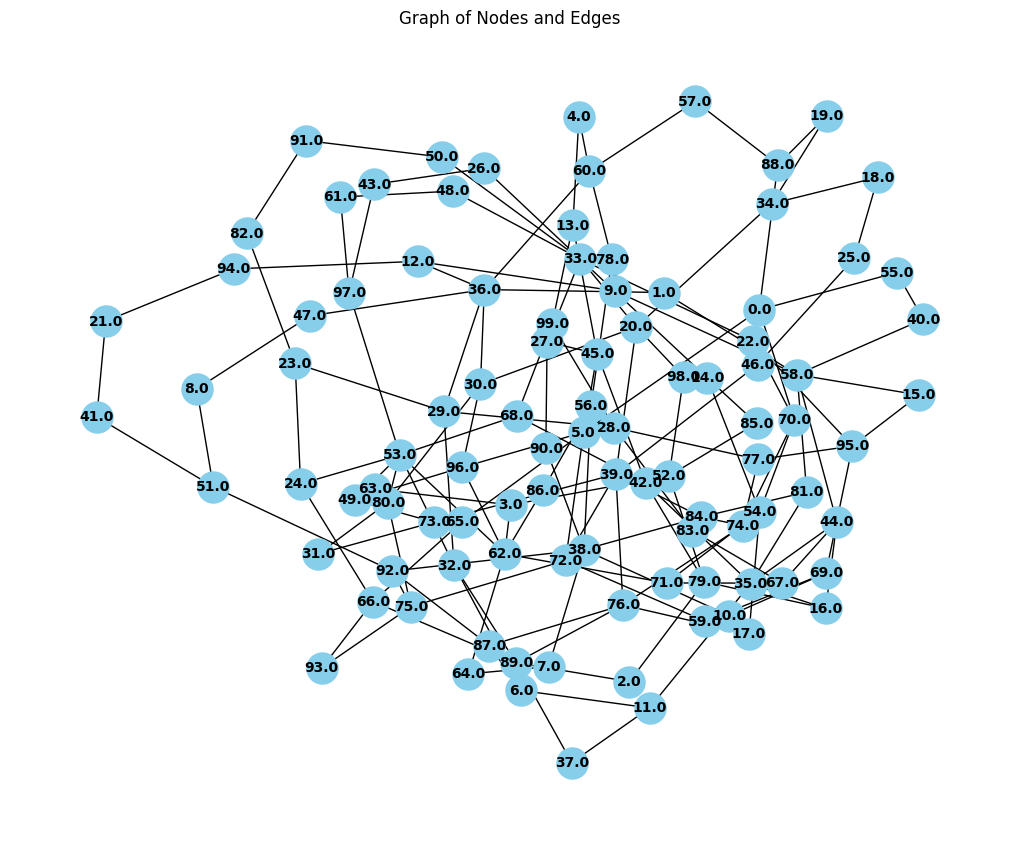

In [6]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes with positions
for index, row in n.iterrows():
    G.add_node(row['id'], pos=(row['x'], row['y']))

# Add edges
for index, row in e.iterrows():
    G.add_edge(row['source'], row['target'], bandwidth=row['bandwidth'], latency=row['latency'])

# Get positions of nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Graph of Nodes and Edges')
plt.show()